# OTOKODLAYICILAR

![](https://cdn.evrimagaci.org/bm2R8z2LCChlqzJNXp5EwbTaZiw=/825x0/filters:no_upscale()/evrimagaci.org%2Fpublic%2Fcontent_media%2F8ee347b9bc1ee90bf1db8f9c00217b5f.png)

![](https://miro.medium.com/max/605/1*stpRRU3tUaOtTjRqh24v0w.png)

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


Kütüphane Kurulumları

In [24]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt

Veri Kümesini Oluşturmak ve Ayırmak

In [27]:
(x_train, _), (x_test, _) = mnist.load_data()

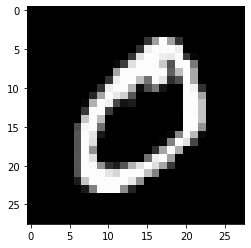

In [28]:
plt.imshow(x_train[1])

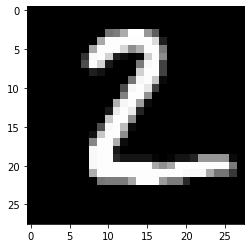

In [29]:
plt.imshow(x_test[1])

In [30]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print(x_train.shape)

x_train = np.reshape (x_train, (len(x_train), 28, 28, 1))
x_test =  np.reshape (x_test, (len(x_test), 28, 28, 1))

print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [31]:
print('Eğtiim',x_train.shape)
print('Test', x_test.shape)

Eğtiim (60000, 28, 28, 1)
Test (10000, 28, 28, 1)


Veriye Gürültü Ekleme Adımı

In [34]:
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0. ,1.)
x_test_noisy = np.clip(x_test_noisy, 0. ,1.)

Gürültülü Veriyi Görselleştirme

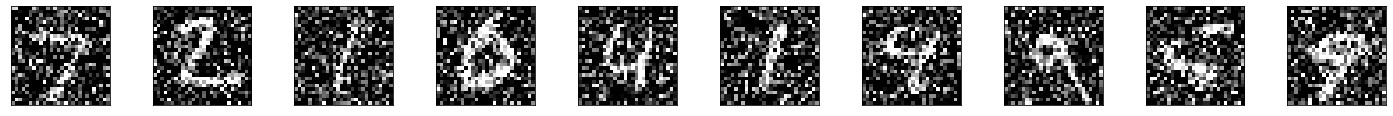

gürültülü orijinal görüntüler


In [35]:
%matplotlib inline

n = 10

plt.figure(figsize = (25,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
print('gürültülü orijinal görüntüler')

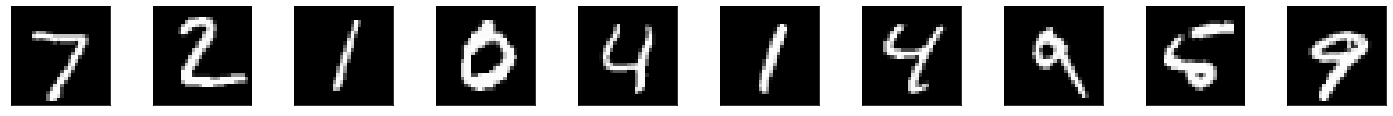

In [36]:
n = 10

plt.figure(figsize = (25,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

ENCODE Modeli

In [37]:
input_img = Input(shape = (28, 28, 1))

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)

x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2,2), padding='same')(x)

# (7, 7, 32)

DECODE Modeli

In [38]:
x = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)

x = UpSampling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)

x = UpSampling2D((2,2))(x)

decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

Modelin Derlenmesi ve Eğitilmesi

In [39]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [40]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])



Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6943 - val_loss: 0.6809
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6634 - val_loss: 0.6419
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6060 - val_loss: 0.5658
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.5298 - val_loss: 0.5096
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.4983 - val_loss: 0.4957
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4875 - val_loss: 0.4866
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4787 - val_loss: 0.4780
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4700 - val_loss: 0.4690
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4608 - val_loss: 0.4592
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4505 - val_lo

Sonuçların Görselleştirilmesi

In [41]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


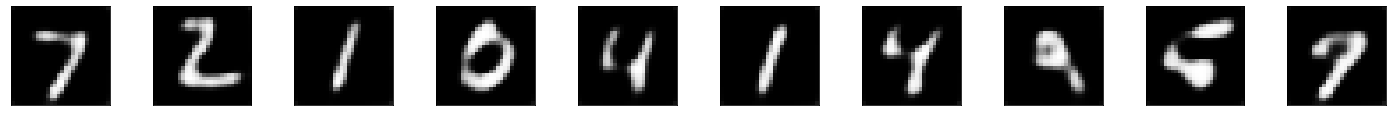

In [42]:
n = 10

plt.figure(figsize = (25,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()